# Film Performance Exploratory Data Analysis

Aidan O'Keefe

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Case

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

Question: what types of films are currently doing the best at the box office?<br>
<br>
Types = Genres<br>
Currently = last 10 years<br>
Best = highest ROI with highest average ratings<br>
<br>
Goal: deliver actionable insights to help decide what type of films to create.

## Data Understanding

We are going to look at data taken from IMDB and The Numbers.com<br>
<br>
IMDB database: film details and rating information<br>
The Numbers.com CSV: budget and sales data<br>

Each record in the data represents a film along with variables such as genres, release year, average rating, vote counts, production budgets, and more.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import plotly.express as px

%matplotlib inline

### IMPORTING SQL DATA FROM IMDB

In [2]:
import sqlite3
conn = sqlite3.connect('/Users/Aidan/Documents/Flatiron/Phase_1/dsc-phase-1-project-v2-4/zippedData/im.db')

In [3]:
q = """

SELECT movie_basics.primary_title AS "Film Name",
        movie_basics.original_title AS "Original Film Name",
        movie_basics.start_year AS "Release Year",
        movie_basics.runtime_minutes AS "Runtime (min)",
        movie_basics.genres AS "Genres",
        movie_ratings.averagerating AS "IMDB Average Rating",
        movie_ratings.numvotes AS "IMDB Votes Count",
        persons.primary_name AS "Director Name",
        persons.primary_profession AS "Director Roles"

FROM movie_basics
JOIN movie_ratings
    ON movie_ratings.movie_id = movie_basics.movie_id
JOIN directors
    ON directors.movie_id = movie_basics.movie_id
JOIN persons
    ON persons.person_id = directors.person_id


"""
imdb_df = pd.read_sql(q, conn)

In [4]:
imdb_df.shape

(181387, 9)

In [5]:
imdb_df.head()

,Film Name,Original Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,Director Name,Director Roles
0,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail,"director,writer,producer"
1,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail,"director,writer,producer"
2,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail,"director,writer,producer"
3,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Harnam Singh Rawail,"director,writer,producer"
4,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,Mani Kaul,"director,writer,actor"


### IMPORTING CSV/TSV DATA

In [6]:
mov_budgets_df = pd.read_csv\
("/Users/Aidan/Documents/Flatiron/Phase_1/dsc-phase-1-project-v2-4/zippedData/tn.movie_budgets.csv")

In [7]:
mov_budgets_df.shape

(5782, 6)

In [8]:
mov_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## DATA PREPARATION AND CLEANING

Describe and justify the process for preparing the data for analysis.

Questions to consider:

Were there variables you dropped or created?
How did you address missing values or outliers?
Why are these choices appropriate given the data and the business problem?


### New Features and Cleaned Data

### IMDB Data

#### Spitting the Genres column

In [9]:
imdb_df.Genres.value_counts()

Drama                      25002
Documentary                18077
Horror                     13006
Comedy                     12723
Comedy,Drama                5903
                           ...  
Fantasy,History,Mystery        1
Biography,Romance,War          1
Family,War                     1
History,Romance,War            1
History,Horror,Mystery         1
Name: Genres, Length: 921, dtype: int64

In [10]:
#Turn Genres column values into a list
imdb_df.Genres= imdb_df.Genres.apply(lambda x: str(x).split(","))

In [11]:
imdb_df.head()

,Film Name,Original Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,Director Name,Director Roles
0,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77,Harnam Singh Rawail,"director,writer,producer"
1,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77,Harnam Singh Rawail,"director,writer,producer"
2,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77,Harnam Singh Rawail,"director,writer,producer"
3,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77,Harnam Singh Rawail,"director,writer,producer"
4,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",7.2,43,Mani Kaul,"director,writer,actor"


In [12]:
#SPLIT GENRE COLUMN INTO COLUMNS

split_genres_df = pd.DataFrame(imdb_df['Genres'].to_list(), columns=['Genre 1','Genre 2', "Genre 3"])

In [13]:
split_genres_df

,Genre 1,Genre 2,Genre 3
0,Action,Crime,Drama
1,Action,Crime,Drama
2,Action,Crime,Drama
3,Action,Crime,Drama
4,Biography,Drama,None
...,...,...,...
181382,Documentary,None,None
181383,Documentary,None,None
181384,None,None,None
181385,None,None,None


Fill in None values in columns with "-" so 1 or 2 genre films can be inlcuded in Genre Combos Analysis

In [14]:
split_genres_df.isna().sum()

Genre 1         0
Genre 2     81256
Genre 3    122039
dtype: int64

In [15]:
split_genres_df = split_genres_df.fillna('-')

In [16]:
split_genres_df.isna().sum()

Genre 1    0
Genre 2    0
Genre 3    0
dtype: int64

Merge the new `split_genres_df` into the main dataframe `budgets_df`

In [17]:
genres_df = imdb_df.merge(split_genres_df, left_index=True, right_index=True)
genres_df

,Film Name,Original Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,Director Name,Director Roles,Genre 1,Genre 2,Genre 3
0,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77,Harnam Singh Rawail,"director,writer,producer",Action,Crime,Drama
1,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77,Harnam Singh Rawail,"director,writer,producer",Action,Crime,Drama
2,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77,Harnam Singh Rawail,"director,writer,producer",Action,Crime,Drama
3,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77,Harnam Singh Rawail,"director,writer,producer",Action,Crime,Drama
4,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",7.2,43,Mani Kaul,"director,writer,actor",Biography,Drama,-
...,...,...,...,...,...,...,...,...,...,...,...,...
181382,Albatross,Albatross,2017,NaN,[Documentary],8.5,8,Chris Jordan,"director,writer,editor",Documentary,-,-
181383,Albatross,Albatross,2017,NaN,[Documentary],8.5,8,Chris Jordan,"director,writer,editor",Documentary,-,-
181384,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,[None],6.6,5,Laura Jou,"miscellaneous,actress,director",None,-,-
181385,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,[None],6.6,5,Laura Jou,"miscellaneous,actress,director",None,-,-


Reassign the column `Genres` to `genres_df` with the split Genres consolidated

In [18]:
genres_df['Genres'] = genres_df["Genre 1"] + " " + genres_df["Genre 2"] + " " +\
                    genres_df["Genre 3"]

In [19]:
genres_df.head()

,Film Name,Original Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,Director Name,Director Roles,Genre 1,Genre 2,Genre 3
0,Sunghursh,Sunghursh,2013,175.0,Action Crime Drama,7.0,77,Harnam Singh Rawail,"director,writer,producer",Action,Crime,Drama
1,Sunghursh,Sunghursh,2013,175.0,Action Crime Drama,7.0,77,Harnam Singh Rawail,"director,writer,producer",Action,Crime,Drama
2,Sunghursh,Sunghursh,2013,175.0,Action Crime Drama,7.0,77,Harnam Singh Rawail,"director,writer,producer",Action,Crime,Drama
3,Sunghursh,Sunghursh,2013,175.0,Action Crime Drama,7.0,77,Harnam Singh Rawail,"director,writer,producer",Action,Crime,Drama
4,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography Drama -,7.2,43,Mani Kaul,"director,writer,actor",Biography,Drama,-


#### Removing Duplicates

Here we run into the issue of some movies having the same name. These duplicates could include remakes done years later or domestic remake of a foreign film. However we know the release year of these films will differ (it is not often two movies with the same name are released in the same year). We can try to avoid the foreign film issue by dropping data sets based on `Original Film Name` rather than `Film Name`.

In [20]:
genres_df.duplicated(subset=["Original Film Name", "Release Year"]).value_counts()

True     108659
False     72728
dtype: int64

In [21]:
genres_df[genres_df.duplicated(subset=["Original Film Name", "Release Year"]) == True]

,Film Name,Original Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,Director Name,Director Roles,Genre 1,Genre 2,Genre 3
1,Sunghursh,Sunghursh,2013,175.0,Action Crime Drama,7.0,77,Harnam Singh Rawail,"director,writer,producer",Action,Crime,Drama
2,Sunghursh,Sunghursh,2013,175.0,Action Crime Drama,7.0,77,Harnam Singh Rawail,"director,writer,producer",Action,Crime,Drama
3,Sunghursh,Sunghursh,2013,175.0,Action Crime Drama,7.0,77,Harnam Singh Rawail,"director,writer,producer",Action,Crime,Drama
6,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama - -,6.9,4517,Orson Welles,"actor,director,writer",Drama,-,-
9,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,Comedy Drama Fantasy,6.5,119,Raoul Ruiz,"director,writer,producer",Comedy,Drama,Fantasy
...,...,...,...,...,...,...,...,...,...,...,...,...
181376,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama - -,8.4,365,Vineesh Aaradya,"writer,director",Drama,-,-
181379,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary - -,6.2,6,Giancarlo Soldi,"director,writer,producer",Documentary,-,-
181381,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Drama Family -,8.7,136,Ahmet Faik Akinci,"director,writer",Drama,Family,-
181383,Albatross,Albatross,2017,NaN,Documentary - -,8.5,8,Chris Jordan,"director,writer,editor",Documentary,-,-


In [22]:
#EXAMPLE OF A DUPLICATE

genres_df[(genres_df['Original Film Name'] == "Sunghursh") & (genres_df["Release Year"] == 2013)]

,Film Name,Original Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,Director Name,Director Roles,Genre 1,Genre 2,Genre 3
0,Sunghursh,Sunghursh,2013,175.0,Action Crime Drama,7.0,77,Harnam Singh Rawail,"director,writer,producer",Action,Crime,Drama
1,Sunghursh,Sunghursh,2013,175.0,Action Crime Drama,7.0,77,Harnam Singh Rawail,"director,writer,producer",Action,Crime,Drama
2,Sunghursh,Sunghursh,2013,175.0,Action Crime Drama,7.0,77,Harnam Singh Rawail,"director,writer,producer",Action,Crime,Drama
3,Sunghursh,Sunghursh,2013,175.0,Action Crime Drama,7.0,77,Harnam Singh Rawail,"director,writer,producer",Action,Crime,Drama


In [23]:
#DROP DUPLICATES BY FILM NAME AND RELEASE YEAR
genres_df = genres_df.drop_duplicates(subset= ["Original Film Name", "Release Year"], keep='first', inplace=False)

In [24]:
genres_df.shape

(72728, 12)

In [25]:
genres_df.set_index('Original Film Name', inplace=True)

In [26]:
genres_df.reset_index(inplace=True)

In [27]:
#EXAMPLE THAT DUPLICATES BY FILM NAME AND YEAR ARE GONE

genres_df[genres_df['Original Film Name'] == "Sunghursh"]

,Original Film Name,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,Director Name,Director Roles,Genre 1,Genre 2,Genre 3
0,Sunghursh,Sunghursh,2013,175.0,Action Crime Drama,7.0,77,Harnam Singh Rawail,"director,writer,producer",Action,Crime,Drama


In [28]:
genres_df.head()

,Original Film Name,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,Director Name,Director Roles,Genre 1,Genre 2,Genre 3
0,Sunghursh,Sunghursh,2013,175.0,Action Crime Drama,7.0,77,Harnam Singh Rawail,"director,writer,producer",Action,Crime,Drama
1,Ashad Ka Ek Din,One Day Before the Rainy Season,2019,114.0,Biography Drama -,7.2,43,Mani Kaul,"director,writer,actor",Biography,Drama,-
2,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama - -,6.9,4517,Orson Welles,"actor,director,writer",Drama,-,-
3,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,Comedy Drama -,6.1,13,Hrishikesh Mukherjee,"director,editor,writer",Comedy,Drama,-
4,La Telenovela Errante,The Wandering Soap Opera,2017,80.0,Comedy Drama Fantasy,6.5,119,Raoul Ruiz,"director,writer,producer",Comedy,Drama,Fantasy


### The Numbers.com CSV Data

Stripping the `production_budget` `domestic_gross` and `worldwide_gross` columns of the "$" and commas.
Also turning data type into integers to allow for calculations.

In [29]:
mov_budgets_df['production_budget'] = \
(mov_budgets_df['production_budget'].str.replace(',','').str.replace('$','')).astype(int)

In [30]:
mov_budgets_df['domestic_gross'] = \
(mov_budgets_df['domestic_gross'].str.replace(',','').str.replace('$','')).astype(int)

In [31]:
mov_budgets_df['worldwide_gross'] = \
mov_budgets_df['worldwide_gross'].str.replace(',','').str.replace('$','').astype(int)

Creating new columns `Domestic Profit` and `Worldwide Profit`

In [32]:
mov_budgets_df['Domestic Profit'] = mov_budgets_df['domestic_gross'] - mov_budgets_df['production_budget']

In [33]:
mov_budgets_df['Worldwide Profit'] = mov_budgets_df['worldwide_gross'] - mov_budgets_df['production_budget']

Creating new column `ROI (percent)` (Return on Investment) for each film. 

`ROI (percent)` equals 100 X (`Worldwide Profit` minus `production_budget` divided by `production_budget`)

In [34]:
mov_budgets_df["ROI (percent)"] = 100 * ((mov_budgets_df['Worldwide Profit'] - mov_budgets_df['production_budget'])\
                        / mov_budgets_df['production_budget'])

In [35]:
mov_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,453.257713
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,54.667286
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-157.210757
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,224.384139
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,215.369636


Create a `release_year` column from `release_date` in `mov_budgets_df`

In [36]:
mov_budgets_df['release_year'] = [i[-4:] for i in mov_budgets_df["release_date"]]

In [37]:
mov_budgets_df["release_year"].dtype

dtype('O')

In [38]:
mov_budgets_df["release_year"] = mov_budgets_df["release_year"].astype(int)

In [39]:
mov_budgets_df["release_year"].dtype

dtype('int64')

In [40]:
mov_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent),release_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,335507625,2351345279,453.257713,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,54.667286,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-157.210757,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,224.384139,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,215.369636,2017


Change `release_date` to datetime format

In [41]:
mov_budgets_df["release_date"].dtype

dtype('O')

In [42]:
mov_budgets_df["release_date"] = pd.to_datetime(mov_budgets_df["release_date"] )

In [43]:
mov_budgets_df["release_date"].dtype

dtype('<M8[ns]')

In [44]:
mov_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent),release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,335507625,2351345279,453.257713,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,-169536125,635063875,54.667286,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-307237650,-200237650,-157.210757,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,128405868,1072413963,224.384139,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,303181382,999721747,215.369636,2017


### Consolidating Data Frames

#### IMDB Data Base and The Numbers CSV Merge

Merging based on the following columns in each data frame:
- genres_df('Original Film Name')
- mov_budgets_df ('movie')

In [45]:
genres_budgets_df = genres_df.merge(mov_budgets_df, how="inner", left_on= "Original Film Name", right_on= "movie")

In [46]:
genres_budgets_df.shape

(2545, 22)

In [47]:
genres_budgets_df= genres_budgets_df[genres_budgets_df["Release Year"] == genres_budgets_df["release_year"]]

In [48]:
genres_budgets_df.head(10)

,Original Film Name,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,Director Name,Director Roles,Genre 1,...,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent),release_year
0,Foodfight!,Foodfight!,2012,91.0,Action Animation Comedy,1.9,8248,Lawrence Kasanoff,"producer,writer,director",Action,...,26,2012-12-31,Foodfight!,45000000,0,73706,-45000000,-44926294,-199.836209,2012
2,The Overnight,The Overnight,2015,79.0,Comedy Mystery -,6.1,14828,Patrick Brice,"director,writer,actor",Comedy,...,21,2015-06-19,The Overnight,200000,1109808,1165996,909808,965996,382.998000,2015
6,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,Adventure Comedy Drama,7.3,275300,Ben Stiller,"producer,actor,director",Adventure,...,37,2013-12-25,The Secret Life of Walter Mitty,91000000,58236838,187861183,-32763162,96861183,6.440860,2013
7,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,Action Crime Drama,6.5,105116,Scott Frank,"writer,producer,director",Action,...,67,2014-09-19,A Walk Among the Tombstones,28000000,26017685,62108587,-1982315,34108587,21.816382,2014
8,Jurassic World,Jurassic World,2015,124.0,Action Adventure Sci-Fi,7.0,539338,Colin Trevorrow,"writer,producer,director",Action,...,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,437270625,1433854864,566.909239,2015
9,The Rum Diary,The Rum Diary,2011,119.0,Comedy Drama -,6.2,94787,Bruce Robinson,"actor,writer,director",Comedy,...,16,2011-10-28,The Rum Diary,45000000,13109815,21544732,-31890185,-23455268,-152.122818,2011
10,The Three Stooges,The Three Stooges,2012,92.0,Comedy Family -,5.1,28570,Bobby Farrelly,"producer,writer,director",Comedy,...,4,2012-04-13,The Three Stooges,30000000,44338224,54052249,14338224,24052249,-19.825837,2012
11,Anderson's Cross,Anderson's Cross,2010,98.0,Comedy Drama Romance,5.5,106,Jerome Elston Scott,"actor,director,writer",Comedy,...,65,2010-12-31,Anderson's Cross,300000,0,0,-300000,-300000,-200.000000,2010
12,Tangled,Tangled,2010,100.0,Adventure Animation Comedy,7.8,366366,Byron Howard,"animation_department,director,actor",Adventure,...,15,2010-11-24,Tangled,260000000,200821936,586477240,-59178064,326477240,25.568169,2010
13,John Carter,John Carter,2012,132.0,Action Adventure Sci-Fi,6.6,241792,Andrew Stanton,"writer,actor,producer",Action,...,14,2012-03-09,John Carter,275000000,73058679,282778100,-201941321,7778100,-97.171600,2012


In [49]:
genres_budgets_df.shape

(1463, 22)

#### Removing unwanted columns

In [50]:
genres_budgets_df = genres_budgets_df.drop(axis=1, columns = \
            ['id','movie','release_year'])

In [51]:
genres_budgets_df.shape

(1463, 19)

### Dealing with Missing Values

Questions to consider:
<br>
How did you address missing values or outliers?<br>
Why are these choices appropriate given the data and the business problem?


Now let's take a look at the missing values of our newly compiled data frame.

In [52]:
genres_budgets_df.isna().sum()

Original Film Name     0
Film Name              0
Release Year           0
Runtime (min)          4
Genres                 0
IMDB Average Rating    0
IMDB Votes Count       0
Director Name          0
Director Roles         0
Genre 1                0
Genre 2                0
Genre 3                0
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
Domestic Profit        0
Worldwide Profit       0
ROI (percent)          0
dtype: int64

We can see we are missing 4 values in `Runtime (min)`. We may be able to impute the missing `Runtime (min)` by looking up the films, however it may be worth simply dropping the records as there are so few of them. I am not analyzing `Runtime (min)` so will leave these records alone and drop the column `Runtime (min)`.

In [53]:
genres_budgets_df[genres_budgets_df['Runtime (min)'].isna()==True]

,Original Film Name,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,Director Name,Director Roles,Genre 1,Genre 2,Genre 3,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
1043,Should've Been Romeo,Should've Been Romeo,2012,NaN,Comedy Drama -,6.5,44,Marc Bennett,"director,producer,writer",Comedy,Drama,-,2012-12-31,5000000,0,0,-5000000,-5000000,-200.000000
1333,Destiny,Destiny,2014,NaN,Adventure Comedy Family,8.4,25,Eddie Nilsson,"producer,director,actor",Adventure,Comedy,Family,2014-12-31,750000,0,450,-750000,-749550,-199.940000
2235,The Promise,The Promise,2017,NaN,Comedy - -,8.8,53,Candy J. Beard,"producer,writer,actress",Comedy,-,-,2017-04-21,90000000,8224288,10551417,-81775712,-79448583,-188.276203
2294,Romantic Schemer,Romantic Schemer,2015,NaN,Romance - -,5.3,178,Valentine,"director,actor,writer",Romance,-,-,2015-12-31,125000,0,0,-125000,-125000,-200.000000


In [54]:
genres_budgets_df = genres_budgets_df.drop(axis=1, columns = ['Runtime (min)'])

In [55]:
genres_budgets_df.shape

(1463, 18)

In [56]:
genres_budgets_df.isna().sum()

Original Film Name     0
Film Name              0
Release Year           0
Genres                 0
IMDB Average Rating    0
IMDB Votes Count       0
Director Name          0
Director Roles         0
Genre 1                0
Genre 2                0
Genre 3                0
release_date           0
production_budget      0
domestic_gross         0
worldwide_gross        0
Domestic Profit        0
Worldwide Profit       0
ROI (percent)          0
dtype: int64

### Dealing with Outliers

Using median values that are less affected by outliers will help keep data more accurate for values across an entire genre/ genre combination.

## Data Modeling


Describe and justify the process for analyzing the data.

Questions to consider:

How did you analyze the data?
How did you iterate on your initial approach to make it better?
Why are these choices appropriate given the data and the business problem?

### Timeframe

We want movies that are CURRENTLY doing best. We earlier defined currently as within the last 10 years.

Check `'Release Year` to see how current our movie set is. 

In [57]:
genres_budgets_df['Release Year'].value_counts()

2015    187
2014    178
2010    177
2011    175
2013    162
2012    159
2016    156
2018    120
2017    116
2019     33
Name: Release Year, dtype: int64

This data shows our films are all from 2010 to 2019 which is current.

## Focusing on Return on Investment (ROI)

### What are the 10 Genre Combinations with the greatest ROI?

In [58]:
top_10_genres_ROI = genres_budgets_df.groupby(['Genres']).median()\
.sort_values(by = 'ROI (percent)', ascending=False).head(10)

top_10_genres_ROI 

,Release Year,IMDB Average Rating,IMDB Votes Count,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
Genres,,,,,,,,,
Biography Drama Fantasy,2018.0,5.40,24351.0,3500000.0,25091816.0,44378040.0,21591816.0,40878040.0,1067.944000
Drama Sci-Fi Thriller,2013.0,6.80,133793.0,12000000.0,64575175.0,123681790.0,52575175.0,111681790.0,830.681583
Comedy Documentary -,2013.0,6.80,7880.0,2500000.0,23591043.0,23591043.0,13591043.0,13591043.0,828.324800
Horror Mystery Thriller,2015.0,5.35,43104.0,8500000.0,33071013.5,80442219.0,24749605.5,63090163.0,825.322645
Action Mystery Sci-Fi,2014.0,6.80,387038.0,34000000.0,102427862.0,348319861.0,68427862.0,314319861.0,824.470179
Adventure Drama Fantasy,2012.0,7.30,211733.0,19500000.0,63859435.0,195790794.0,10995746.0,176290794.0,804.055354
Action Comedy Documentary,2010.0,7.00,53289.0,20000000.0,117229692.0,171685793.0,97229692.0,151685793.0,658.428965
Adventure Horror Mystery,2014.0,6.20,66892.0,5000000.0,21222315.0,41824066.0,16222315.0,36824066.0,636.481320
Comedy Fantasy -,2012.5,5.70,97841.0,27000000.0,38642550.5,67959812.5,25435585.0,40709812.5,621.102389


In [59]:
top_10_genres_ROI  = top_10_genres_ROI.reset_index()

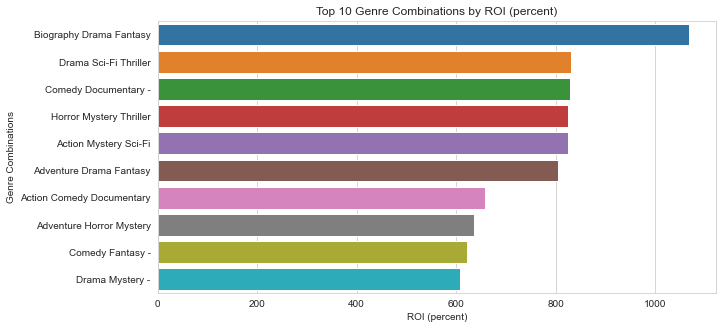

In [60]:
#Visualization of Top 10 Genre Combinations by ROI
fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(x = top_10_genres_ROI['ROI (percent)'], y = top_10_genres_ROI["Genres"])

ax.set_title('Top 10 Genre Combinations by ROI (percent)')

ax.set_xlabel('ROI (percent)')
ax.set_ylabel('Genre Combinations');


From the chart above, we can see that Biography Drama Fantasy has the best ROI by far. The next five genre combinations (Drama Sci-Fi Thriller, Comedy Documentary, Horror Mystery Thriller, Action Mystery Sci-Fi, and Adventure Drama Fantasy) are practically tied for second at around the 800% ROI mark. 

In [61]:
#Create a list of the Genres in top_10_genres_ROI
roi_genres = list(top_10_genres_ROI['Genres'])
roi_genres

['Biography Drama Fantasy',
 'Drama Sci-Fi Thriller',
 'Comedy Documentary -',
 'Horror Mystery Thriller',
 'Action Mystery Sci-Fi',
 'Adventure Drama Fantasy',
 'Action Comedy Documentary',
 'Adventure Horror Mystery',
 'Comedy Fantasy -',
 'Drama Mystery -']

In [62]:
#Create a new datafram subset of only movies with genres in top_10_genres_ROI

roi_genres_df = genres_budgets_df.loc[genres_budgets_df["Genres"].isin(roi_genres)]

Let's look at films in our top ROI Genre "Biography Drama Fantasy":

In [63]:
roi_genres_df[roi_genres_df["Genres"] == "Biography Drama Fantasy"].head()

,Original Film Name,Film Name,Release Year,Genres,IMDB Average Rating,IMDB Votes Count,Director Name,Director Roles,Genre 1,Genre 2,Genre 3,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
218,Winchester,Winchester,2018,Biography Drama Fantasy,5.4,24351,Michael Spierig,"director,writer,visual_effects",Biography,Drama,Fantasy,2018-02-02,3500000,25091816,44378040,21591816,40878040,1067.944


Only one film, "Winchester", seems to match that genre in our data, which does not help us understand if making a "Biography Drama Fantasy" film would result in a consistently high ROI.

In [64]:
roi_genres_df.head()

,Original Film Name,Film Name,Release Year,Genres,IMDB Average Rating,IMDB Votes Count,Director Name,Director Roles,Genre 1,Genre 2,Genre 3,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
17,The Possession,The Possession,2012,Horror Mystery Thriller,5.9,53649,Ole Bornedal,"writer,director,producer",Horror,Mystery,Thriller,2012-08-31,14000000,49130588,82925064,35130588,68925064,392.321886
33,Life of Pi,Life of Pi,2012,Adventure Drama Fantasy,7.9,535836,Ang Lee,"director,producer,writer",Adventure,Drama,Fantasy,2012-11-21,120000000,124987022,620912003,4987022,500912003,317.426669
105,Pet Sematary,Pet Sematary,2019,Horror Mystery Thriller,6.0,34472,Dennis Widmyer,"director,writer,producer",Horror,Mystery,Thriller,2019-04-05,21000000,54724696,109501146,33724696,88501146,321.434029
116,My Soul to Take,My Soul to Take,2010,Horror Mystery Thriller,4.8,18381,Wes Craven,"writer,producer,director",Horror,Mystery,Thriller,2010-10-08,25000000,14744435,16727470,-10255565,-8272530,-133.090120
218,Winchester,Winchester,2018,Biography Drama Fantasy,5.4,24351,Michael Spierig,"director,writer,visual_effects",Biography,Drama,Fantasy,2018-02-02,3500000,25091816,44378040,21591816,40878040,1067.944000


### How has ROI in the above 10 Genre Combinations changed over the last 10 years?

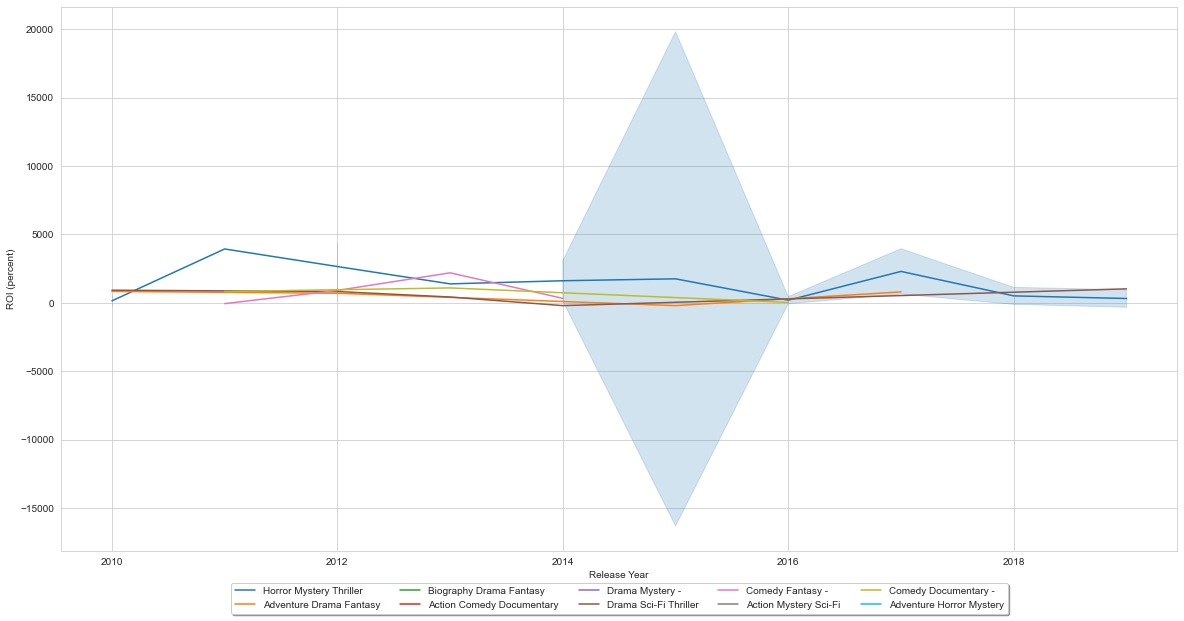

In [65]:
#Create a linegraph of ROI over the past 10 years by Genres

fig, ax =plt.subplots(figsize =(20,10))

sns.lineplot(data=roi_genres_df, x="Release Year", y= "ROI (percent)", hue="Genres", ci='sd', estimator ="median")

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5);

A very high outlier in 2015 seems to be pulling up the ROI for Horror Mystery Thriller category

In [66]:
roi_genres_df[roi_genres_df["Genres"] == "Horror Mystery Thriller"]\
.sort_values(by = "ROI (percent)", ascending = False)

,Original Film Name,Film Name,Release Year,Genres,IMDB Average Rating,IMDB Votes Count,Director Name,Director Roles,Genre 1,Genre 2,Genre 3,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
1643,The Gallows,The Gallows,2015,Horror Mystery Thriller,4.2,17763,Chris Lofing,"producer,director,writer",Horror,Mystery,Thriller,2015-07-10,100000,22764410,41656474,22664410,41556474,41456.474000
2365,Get Out,Get Out,2017,Horror Mystery Thriller,7.7,400474,Jordan Peele,"actor,writer,producer",Horror,Mystery,Thriller,2017-02-24,5000000,176040665,255367951,171040665,250367951,4907.359020
1362,Chernobyl Diaries,Chernobyl Diaries,2012,Horror Mystery Thriller,5.0,60304,Bradley Parker,"visual_effects,director,art_department",Horror,Mystery,Thriller,2012-05-25,1000000,18119640,42411721,17119640,41411721,4041.172100
1119,Paranormal Activity 3,Paranormal Activity 3,2011,Horror Mystery Thriller,5.8,85689,Henry Joost,"writer,producer,director",Horror,Mystery,Thriller,2011-10-21,5000000,104028807,207039844,99028807,202039844,3940.796880
2035,Annabelle,Annabelle,2014,Horror Mystery Thriller,5.4,122039,John R. Leonetti,"cinematographer,camera_department,director",Horror,Mystery,Thriller,2014-10-03,6500000,84273813,256862920,77773813,250362920,3751.737231
1287,Sinister,Sinister,2012,Horror Mystery Thriller,6.8,198345,Scott Derrickson,"writer,director,producer",Horror,Mystery,Thriller,2012-10-12,3000000,48086903,87727807,45086903,84727807,2724.260233
1460,Paranormal Activity 4,Paranormal Activity 4,2012,Horror Mystery Thriller,4.6,58408,Henry Joost,"writer,producer,director",Horror,Mystery,Thriller,2012-10-19,5000000,53900335,142817992,48900335,137817992,2656.359840
2394,Happy Death Day,Happy Death Day,2017,Horror Mystery Thriller,6.5,87132,Christopher Landon,"writer,producer,director",Horror,Mystery,Thriller,2017-10-13,5000000,55683845,125010260,50683845,120010260,2300.205200
305,Ouija,Ouija,2014,Horror Mystery Thriller,4.5,44054,Stiles White,"special_effects,writer,producer",Horror,Mystery,Thriller,2014-10-24,5000000,50856010,103300632,45856010,98300632,1866.012640
2377,Annabelle: Creation,Annabelle: Creation,2017,Horror Mystery Thriller,6.5,90402,David F. Sandberg,"director,composer,writer",Horror,Mystery,Thriller,2017-08-11,15000000,102092201,305384865,87092201,290384865,1835.899100


The explosive ROI success of The Gallows in 2015 seems to be what is skewing the graph. Let's remove it for now to get a clearer overall picture.

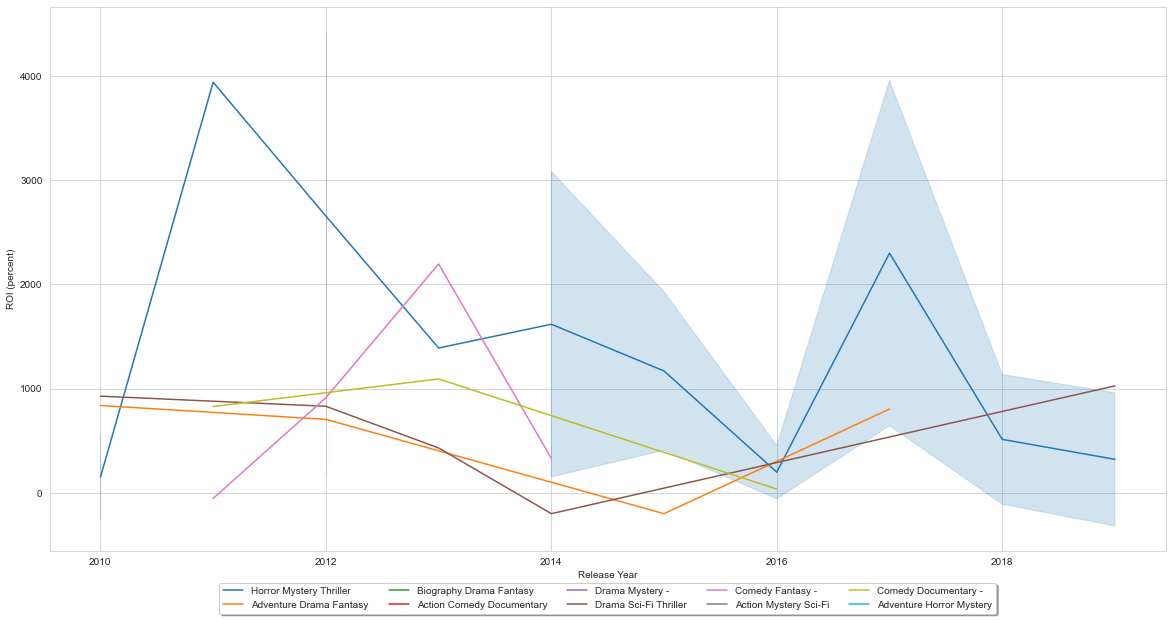

In [67]:
#LINEGRAPH WITHOUT THE GALLOWS OUTLIER

fig, ax =plt.subplots(figsize =(20,10))

sns.lineplot(data=roi_genres_df[roi_genres_df["Film Name"]!= "The Gallows"],\
             x="Release Year", y="ROI (percent)", hue="Genres", ci='sd', estimator ="median")

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5);

Without The Gallows, it seems ROI for Horror Mystery Thriller is trending downwards, while ROIs for Adventure Drama Fantasy and Drama Sci-Fi Thriller are trending upwards. This trend could signify Drama Sci-Fi Thriller overtaking Horror Mystery Thriller as the top Thriller genre. Adventure Drama Fantasy films also have potential as their 2015 fall in ROI coincides with the Gallows box office domination. 

### How many movies of each of these genres have been made over the last 10 years?

In [68]:
roi_genres_df["Release Year"].value_counts()

2014    9
2012    9
2015    6
2010    6
2016    5
2019    4
2018    4
2017    4
2013    4
2011    3
Name: Release Year, dtype: int64

In [69]:
roi_genres_df.groupby(["Release Year", "Genres"]).count()

Original Film Name  Film Name  \
Release Year Genres                                                     
2010         Action Comedy Documentary                   1          1   
             Adventure Drama Fantasy                     1          1   
             Drama Mystery -                             1          1   
             Drama Sci-Fi Thriller                       1          1   
             Horror Mystery Thriller                     2          2   
2011         Comedy Documentary -                        1          1   
             Comedy Fantasy -                            1          1   
             Horror Mystery Thriller                     1          1   
2012         Adventure Drama Fantasy                     2          2   
             Comedy Fantasy -                            1          1   
             Drama Sci-Fi Thriller                       1          1   
             Horror Mystery Thriller                     5          5   
2013         Comedy Documentary -                        1          1   
             Comedy Fantasy -                            1          1   
             Drama Sci-Fi Thriller                       1          1   
             Horror Mystery Thriller                     1          1   
2014         Action Mystery Sci-Fi                       1          1   
             Adventure Horror Mystery                    1          1   
             Comedy Fantasy -                            1          1   
             Drama Sci-Fi Thriller                       1          1   
             Horror Mystery Thriller                     5          5   
2015         Adventure Drama Fantasy                     1          1   
             Horror Mystery Thriller                     5          5   
2016         Comedy Documentary -                        1          1   
             Horror Mystery Thriller                     4          4   
2017         Adventure Drama Fantasy                     1          1   
             Horror Mystery Thriller                     3          3   
2018         Biography Drama Fantasy                     1          1   
             Horror Mystery Thriller                     3          3   
2019         Drama Sci-Fi Thriller                       1          1   
             Horror Mystery Thriller                     3          3   

                                        IMDB Average Rating  IMDB Votes Count  \
Release Year Genres                                                             
2010         Action Comedy Documentary                    1                 1   
             Adventure Drama Fantasy                      1                 1   
             Drama Mystery -                              1                 1   
             Drama Sci-Fi Thriller                        1                 1   
             Horror Mystery Thriller                      2                 2   
2011         Comedy Documentary -                         1                 1   
             Comedy Fantasy -                             1                 1   
             Horror Mystery Thriller                      1                 1   
2012         Adventure Drama Fantasy                      2                 2   
             Comedy Fantasy -                             1                 1   
             Drama Sci-Fi Thriller                        1                 1   
             Horror Mystery Thriller                      5                 5   
2013         Comedy Documentary -                         1                 1   
             Comedy Fantasy -                             1                 1   
             Drama Sci-Fi Thriller                        1                 1   
             Horror Mystery Thriller                      1                 1   
2014         Action Mystery Sci-Fi                        1                 1   
             Adventure Horror Mystery                     1                 1   
          

By looking at the above data, we can see that practically all of these genres have 1 film made a year except for Horror Mystery Thriller which consistently has had 2 or more films made a year for 8 out of the last 10 years. This tells us that there is much more competition in the Horror Mystery Thriller genre segment.

### What are the Average Ratings over time for the Top Ten ROI Genres?

In [70]:
#USING FULL IMDB DATASET

imdb_roigenres_df = genres_df.loc[genres_df["Genres"].isin(roi_genres)]

imdb_roigenres_df

,Original Film Name,Film Name,Release Year,Runtime (min),Genres,IMDB Average Rating,IMDB Votes Count,Director Name,Director Roles,Genre 1,Genre 2,Genre 3
15,Los pájaros se van con la muerte,Los pájaros se van con la muerte,2011,110.0,Drama Mystery -,4.0,12,Thaelman Urgelles,"writer,producer,director",Drama,Mystery,-
47,Fahrenheit 451,Fahrenheit 451,2018,100.0,Drama Sci-Fi Thriller,4.9,14469,Ramin Bahrani,"director,writer,producer",Drama,Sci-Fi,Thriller
83,The Possession,The Possession,2012,92.0,Horror Mystery Thriller,5.9,53649,Ole Bornedal,"writer,director,producer",Horror,Mystery,Thriller
118,Life of Pi,Life of Pi,2012,127.0,Adventure Drama Fantasy,7.9,535836,Ang Lee,"director,producer,writer",Adventure,Drama,Fantasy
305,Pet Sematary,Pet Sematary,2019,101.0,Horror Mystery Thriller,6.0,34472,Dennis Widmyer,"director,writer,producer",Horror,Mystery,Thriller
...,...,...,...,...,...,...,...,...,...,...,...,...
71294,Zhao dao ni,"Lost, Found",2018,102.0,Drama Mystery -,6.5,190,Yue Lü,"cinematographer,director,actor",Drama,Mystery,-
71612,Dark Sister,Dark Sister,2018,96.0,Horror Mystery Thriller,3.0,30,Sam Barrett,"director,writer,actor",Horror,Mystery,Thriller
71838,Fantastica,Fantastica,2018,115.0,Comedy Fantasy -,4.7,100,Barry Gonzalez,"assistant_director,production_manager,miscella...",Comedy,Fantasy,-
71876,Gorg Bazi,A Bigger Game,2018,90.0,Drama Mystery -,5.0,126,Abbas Nezamdoost,"director,writer,cinematographer",Drama,Mystery,-


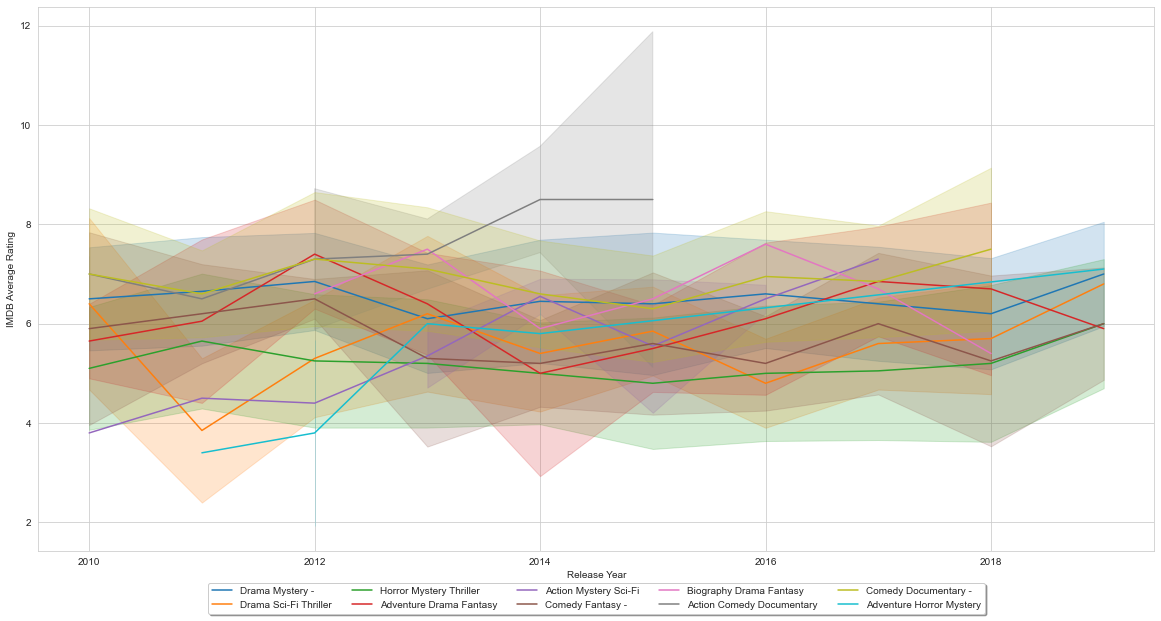

In [71]:
#USING FULL IMDB DATASET

fig, ax =plt.subplots(figsize =(20,10))

sns.lineplot(data=imdb_roigenres_df, x="Release Year", y="IMDB Average Rating", hue="Genres",\
             ci='sd', estimator="median")

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5);

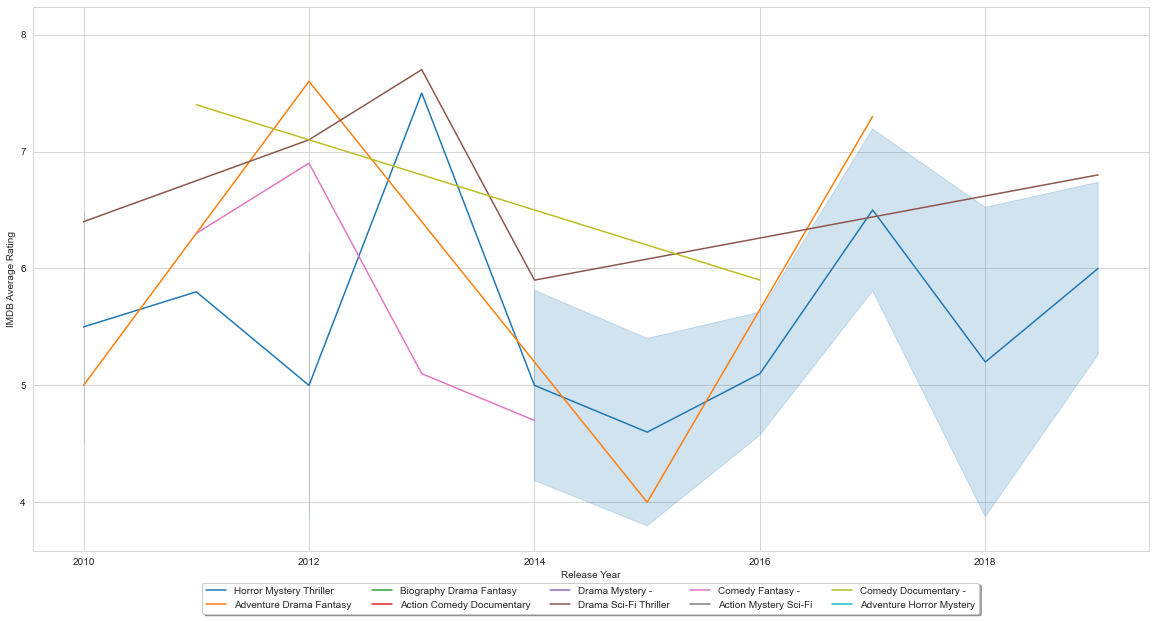

In [72]:
# #LINEPLOT FOR AVERAGE RATINGS OVER TIME IN TOP 10 ROI GENRES WHERE WE HAVE FINACIAL DATA
fig, ax =plt.subplots(figsize =(20,10))

sns.lineplot(data=roi_genres_df, x="Release Year", y="IMDB Average Rating", hue="Genres", ci='sd', \
estimator="median")

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5);

From the above graph, we can see that Drama Sci-Fi Thriller has the most consistent and highest average rating. Adventure Drama Fantasy seems to often be "hit or miss" with ratings oscillating from 7.5 to 4.

### Which Directors are best for this genre (Drama Sci-Fi Thriller )?

The directors best suited to direct films in this genre would be those that have successfully directed Drama Sci-Fi Thriller films specifically or some combination of two of the genres (i.e. Drama Sci-Fi, Drama Thriller, or Sci-Fi Thriller).

In [73]:
#Compile a list of directors who could direct Drama Sci-Fi Thrillers

dst_directors = genres_budgets_df[(genres_budgets_df["Genres"] == "Drama Sci-Fi Thriller")]
ds_directors = genres_budgets_df[(genres_budgets_df["Genres"] == "Drama Sci-Fi -")]
dt_directors = genres_budgets_df[(genres_budgets_df["Genres"] == "Drama Thriller -")] 
st_directors = genres_budgets_df[(genres_budgets_df["Genres"] == "Sci-Fi Thriller -")]

dst_directors_df = pd.concat([dst_directors, ds_directors, dt_directors, st_directors], ignore_index=True)

We have a list of 32 directors who have directed films in these genres. 

In [83]:
#Sort list of 32 DST Directors by ROI and create new variable with Top 10 ROI DST Directors
top_10_roi_dst_dir = dst_directors_df.sort_values(by = "ROI (percent)", ascending=False).head(10)
top_10_roi_dst_dir

,Original Film Name,Film Name,Release Year,Genres,IMDB Average Rating,IMDB Votes Count,Director Name,Director Roles,Genre 1,Genre 2,Genre 3,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent),Release Month
20,Jodaeiye Nader az Simin,A Separation,2011,Drama Thriller -,8.3,197684,Asghar Farhadi,"writer,director,producer",Drama,Thriller,-,2011-12-30,800000,7098492,24426169,6298492,23626169,2853.271125,12
7,Black Swan,Black Swan,2010,Drama Thriller -,8.0,648854,Darren Aronofsky,"producer,director,writer",Drama,Thriller,-,2010-12-03,13000000,106954678,331266710,93954678,318266710,2348.205462,12
4,Glass,Glass,2019,Drama Sci-Fi Thriller,6.8,133793,M. Night Shyamalan,"producer,writer,director",Drama,Sci-Fi,Thriller,2019-01-18,20000000,111035005,245303505,91035005,225303505,1026.517525,1
1,Monsters,Monsters,2010,Drama Sci-Fi Thriller,6.4,84332,Gareth Edwards,"visual_effects,director,writer",Drama,Sci-Fi,Thriller,2010-10-29,500000,237301,5639730,-262699,5139730,927.946000,10
2,Chronicle,Chronicle,2012,Drama Sci-Fi Thriller,7.1,229258,Josh Trank,"writer,director,editor",Drama,Sci-Fi,Thriller,2012-02-03,12000000,64575175,123681790,52575175,111681790,830.681583,2
0,Gravity,Gravity,2013,Drama Sci-Fi Thriller,7.7,710018,Alfonso Cuarón,"writer,producer,director",Drama,Sci-Fi,Thriller,2013-10-04,110000000,274092705,693698673,164092705,583698673,430.635157,10
15,Margin Call,Margin Call,2011,Drama Thriller -,7.1,107264,J.C. Chandor,"producer,director,writer",Drama,Thriller,-,2011-10-21,3400000,5353586,20433227,1953586,17033227,400.977265,10
21,Flight,Flight,2012,Drama Thriller -,7.3,303009,Robert Zemeckis,"producer,writer,director",Drama,Thriller,-,2012-11-02,31000000,93772375,160558438,62772375,129558438,317.930445,11
22,Addicted,Addicted,2014,Drama Thriller -,5.2,7640,Bille Woodruff,"director,cinematographer,producer",Drama,Thriller,-,2014-10-10,5000000,17390770,17499242,12390770,12499242,149.984840,10
8,The Ides of March,The Ides of March,2011,Drama Thriller -,7.1,207417,George Clooney,"actor,producer,director",Drama,Thriller,-,2011-10-07,23000000,40962534,77735925,17962534,54735925,137.982283,10


Let's look at ROI for all films done by our Drama Sci-Fi Thriller directors

In [84]:
#Create of list of the names of our DST Directors
dst_dir_names = list(top_10_roi_dst_dir["Director Name"])
dst_dir_names

['Asghar Farhadi',
 'Darren Aronofsky',
 'M. Night Shyamalan',
 'Gareth Edwards',
 'Josh Trank',
 'Alfonso Cuarón',
 'J.C. Chandor',
 'Robert Zemeckis',
 'Bille Woodruff',
 'George Clooney']

In [85]:
#Create a dataframe of all the movies directed by our DST Directors
dst_dir_all_movies = genres_budgets_df.loc[genres_budgets_df["Director Name"].isin(dst_dir_names)]

#Sort movies by highest ROI
dst_dir_all_movies.sort_values(by = "ROI (percent)", ascending=False).head(10)

,Original Film Name,Film Name,Release Year,Genres,IMDB Average Rating,IMDB Votes Count,Director Name,Director Roles,Genre 1,Genre 2,Genre 3,release_date,production_budget,domestic_gross,worldwide_gross,Domestic Profit,Worldwide Profit,ROI (percent)
1186,Jodaeiye Nader az Simin,A Separation,2011,Drama Thriller -,8.3,197684,Asghar Farhadi,"writer,director,producer",Drama,Thriller,-,2011-12-30,800000,7098492,24426169,6298492,23626169,2853.271125
137,Black Swan,Black Swan,2010,Drama Thriller -,8.0,648854,Darren Aronofsky,"producer,director,writer",Drama,Thriller,-,2010-12-03,13000000,106954678,331266710,93954678,318266710,2348.205462
841,The Visit,The Visit,2015,Horror Mystery Thriller,6.2,102459,M. Night Shyamalan,"producer,writer,director",Horror,Mystery,Thriller,2015-09-11,5000000,65206105,98677816,60206105,93677816,1773.556320
2290,Glass,Glass,2019,Drama Sci-Fi Thriller,6.8,133793,M. Night Shyamalan,"producer,writer,director",Drama,Sci-Fi,Thriller,2019-01-18,20000000,111035005,245303505,91035005,225303505,1026.517525
666,Monsters,Monsters,2010,Drama Sci-Fi Thriller,6.4,84332,Gareth Edwards,"visual_effects,director,writer",Drama,Sci-Fi,Thriller,2010-10-29,500000,237301,5639730,-262699,5139730,927.946000
1025,Chronicle,Chronicle,2012,Drama Sci-Fi Thriller,7.1,229258,Josh Trank,"writer,director,editor",Drama,Sci-Fi,Thriller,2012-02-03,12000000,64575175,123681790,52575175,111681790,830.681583
641,Gravity,Gravity,2013,Drama Sci-Fi Thriller,7.7,710018,Alfonso Cuarón,"writer,producer,director",Drama,Sci-Fi,Thriller,2013-10-04,110000000,274092705,693698673,164092705,583698673,430.635157
858,Margin Call,Margin Call,2011,Drama Thriller -,7.1,107264,J.C. Chandor,"producer,director,writer",Drama,Thriller,-,2011-10-21,3400000,5353586,20433227,1953586,17033227,400.977265
1271,Flight,Flight,2012,Drama Thriller -,7.3,303009,Robert Zemeckis,"producer,writer,director",Drama,Thriller,-,2012-11-02,31000000,93772375,160558438,62772375,129558438,317.930445
1531,Addicted,Addicted,2014,Drama Thriller -,5.2,7640,Bille Woodruff,"director,cinematographer,producer",Drama,Thriller,-,2014-10-10,5000000,17390770,17499242,12390770,12499242,149.984840


Now let's graph ROI for our Top 10 ROI DST Directors over the last 10 Years

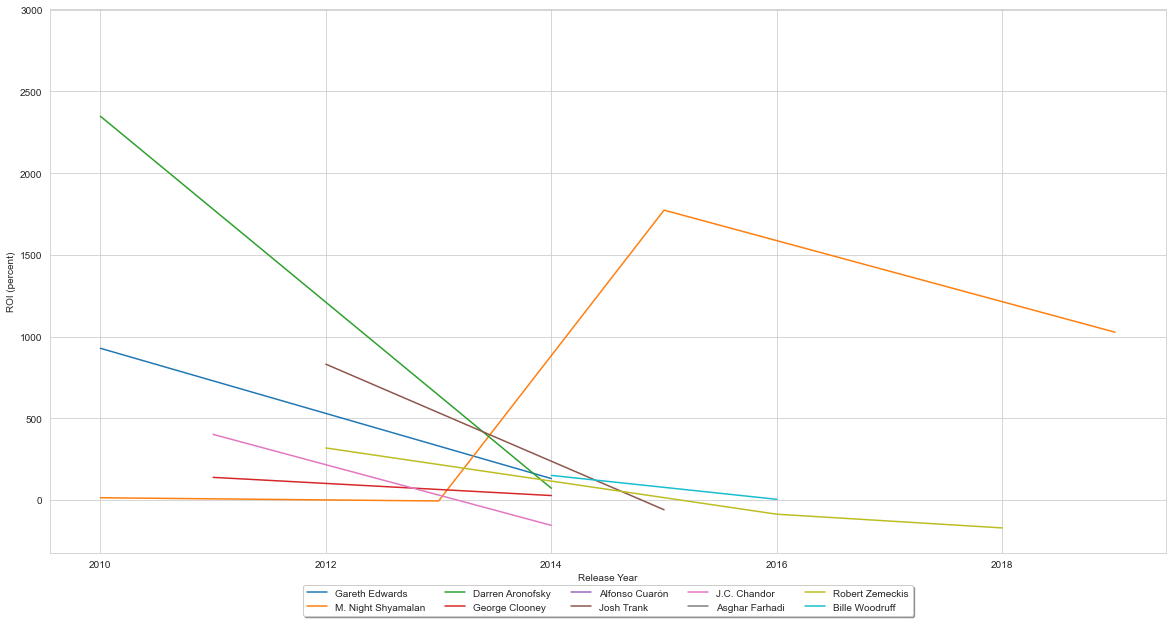

In [86]:
#Create a linegraph of ROI for movies grouped by Top 10 ROI DST Director over the past 10 years

fig, ax =plt.subplots(figsize =(20,10))

sns.lineplot(data= dst_dir_all_movies, x="Release Year", y= "ROI (percent)", \
             hue="Director Name", ci='sd', estimator ="median")

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5);

Based on ROI by director over the past 10 years I recommend:<br>
1. M. Night Shyamalan (Glass, The Visit)<br>
2. Gareth Edwards (Monsters)<br>
3. Darren Aronofsky (Black Swan)<br>
4. Asghar Farhadi (A Separation)<br>
5. Alfonso Cuarón (Gravity)<br>

This recommendation comes with the caveat that Microsoft allow these directors to direct only a Drama Sci-Fi Thriller movie. When the top 3 directors I recommended step outside those genres, they often are not successful.

### What month is best to release a film this genre (Drama Sci-Fi Thriller )?

In [78]:
#CREATE NEW COLUMN WITH RELEASE MONTH
dst_directors_df['Release Month'] = dst_directors_df['release_date'].dt.month

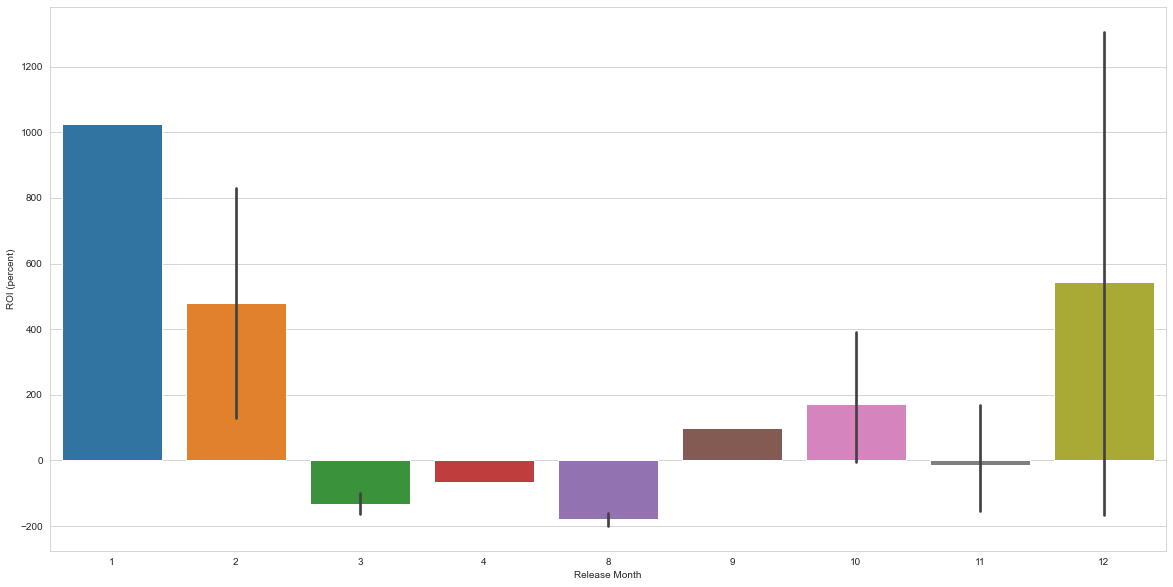

In [79]:
#Graph relationship between Release Month and ROI
fig, ax =plt.subplots(figsize =(20,10))

sns.barplot(data= dst_directors_df, x="Release Month", y= "ROI (percent)");

We can see that Drama Sci-Fi Thriller films (and their variations- Drama Sc-Fi, Drama Thriller, and Sci-Fi Thriller) tend to do best in the winter months from Decemeber through February and in particular in January.

## Conclusions

### Recommendation:

Based on ROI trends in the industry, I would recommend making a Drama Sci-Fi Thriller film due to a rising ROI trend, consistently high average ratings, and low competition. As director, I would recommend M. Night Shyamalan, who is very successful when directing thrillers. Finally, I would recommend releaseing this film in January to increase our chance at success.

### Next Steps


Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

- What would you recommend the business do as a result of this work?
- What are some reasons why your analysis might not fully solve the business problem?
- What else could you do in the future to improve this project?